In [98]:
import pandas as pd
import numpy as np
import tensorflow as tf
from pathlib import Path
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

%load_ext autoreload
%autoreload 2
from base import utils, datahandler, prediction_models, evaluation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
challenge_data_dir = Path('dataset/')
data_dir = challenge_data_dir / "train"
labels_dir = challenge_data_dir / 'train_labels.csv'

split_dataframes = datahandler.load_and_prepare_dataframes(data_dir, labels_dir)

In [103]:
concatenated_dataframes = pd.concat(split_dataframes.values())
# re-arrange columns
cols = concatenated_dataframes.columns.to_list()
cols.remove('ObjectID')
cols.remove('TimeIndex')
cols_ordered = ['ObjectID', 'TimeIndex'] + cols
df = concatenated_dataframes[cols_ordered]

In [104]:
inputs = concatenated_dataframes.columns.to_list()
print(inputs)
inputs.remove('ObjectID')
inputs.remove('TimeIndex')
inputs.remove('EW')
inputs.remove('EW_Node')
inputs.remove('EW_Type')
inputs.remove('NS')
inputs.remove('NS_Node')
inputs.remove('NS_Type')
print(len(inputs))

['Eccentricity', 'Semimajor Axis (m)', 'Inclination (deg)', 'RAAN (deg)', 'Argument of Periapsis (deg)', 'Mean Anomaly (deg)', 'True Anomaly (deg)', 'Latitude (deg)', 'Longitude (deg)', 'Altitude (m)', 'X (m)', 'Y (m)', 'Z (m)', 'Vx (m/s)', 'Vy (m/s)', 'Vz (m/s)', 'ObjectID', 'TimeIndex', 'EW', 'EW_Node', 'EW_Type', 'NS', 'NS_Node', 'NS_Type']
16


In [112]:
scaled_df = df.copy()
scaled_df[inputs] = StandardScaler().fit_transform(df[inputs].values)


In [106]:
def plot_hists(df, ObjectID):
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,12))
    if ObjectID is not None:
        df=df.loc[df['ObjectID'] == 1]
    plt.tight_layout()
    for row in range(4):
        for column in range(4):
            feature = inputs[row*4+column]
            axes[row,column].hist(df[feature], bins=30)
            axes[row,column].title.set_text(feature)
    fig.show()

def plot_vals(df, objects=[], time_index_start=0, time_index_end=None):
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,12))
    plt.tight_layout()
    for row in range(4):
        for column in range(4):
            feature = inputs[row*4+column]
            if objects:
                for object in objects:
                    obj_df = df.loc[df['ObjectID'] == object]
                    if time_index_end is not None:
                        obj_df=obj_df[time_index_start:time_index_end]
                    axes[row,column].plot(obj_df['TimeIndex'], obj_df[feature], label=str(object))
                axes[row,column].legend()
            else:
                axes[row,column].plot(df['TimeIndex'], df[feature])
            axes[row,column].title.set_text(feature)
    fig.show()

C:\Users\David\AppData\Local\Temp\ipykernel_9468\870020823.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\David\AppData\Local\Temp\ipykernel_9468\870020823.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


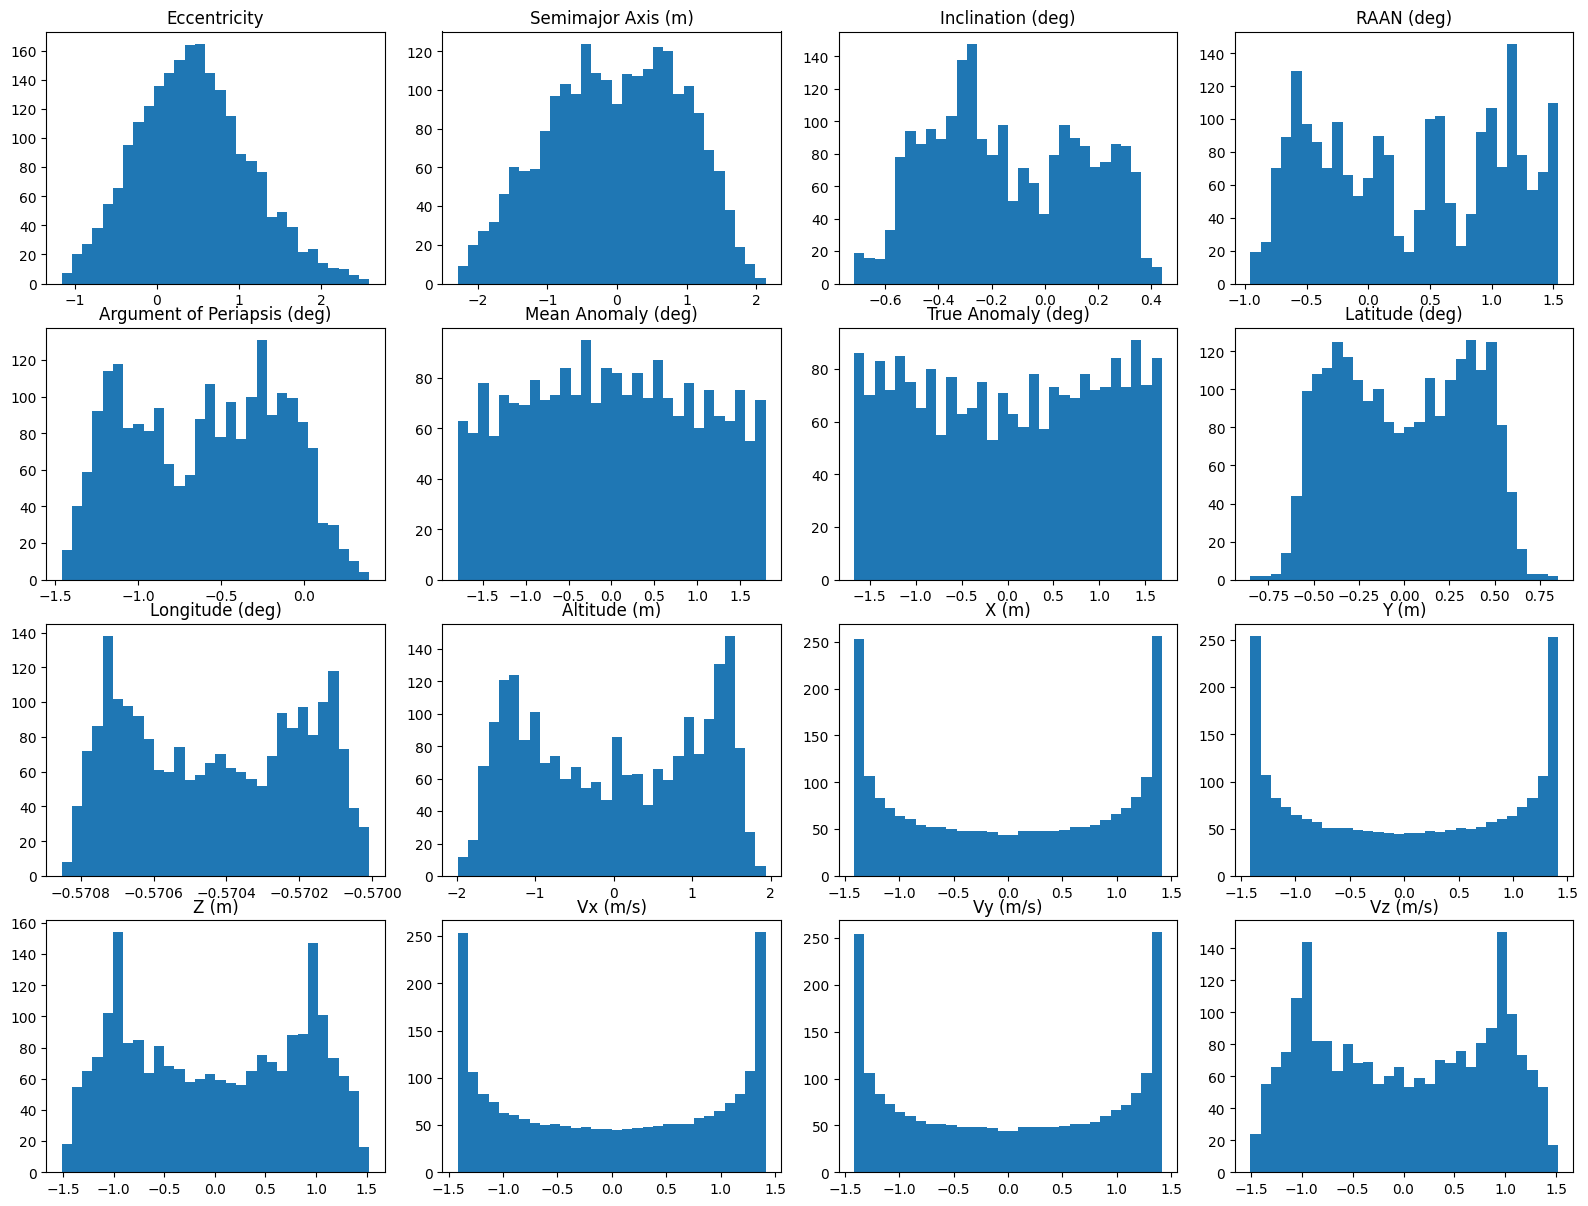

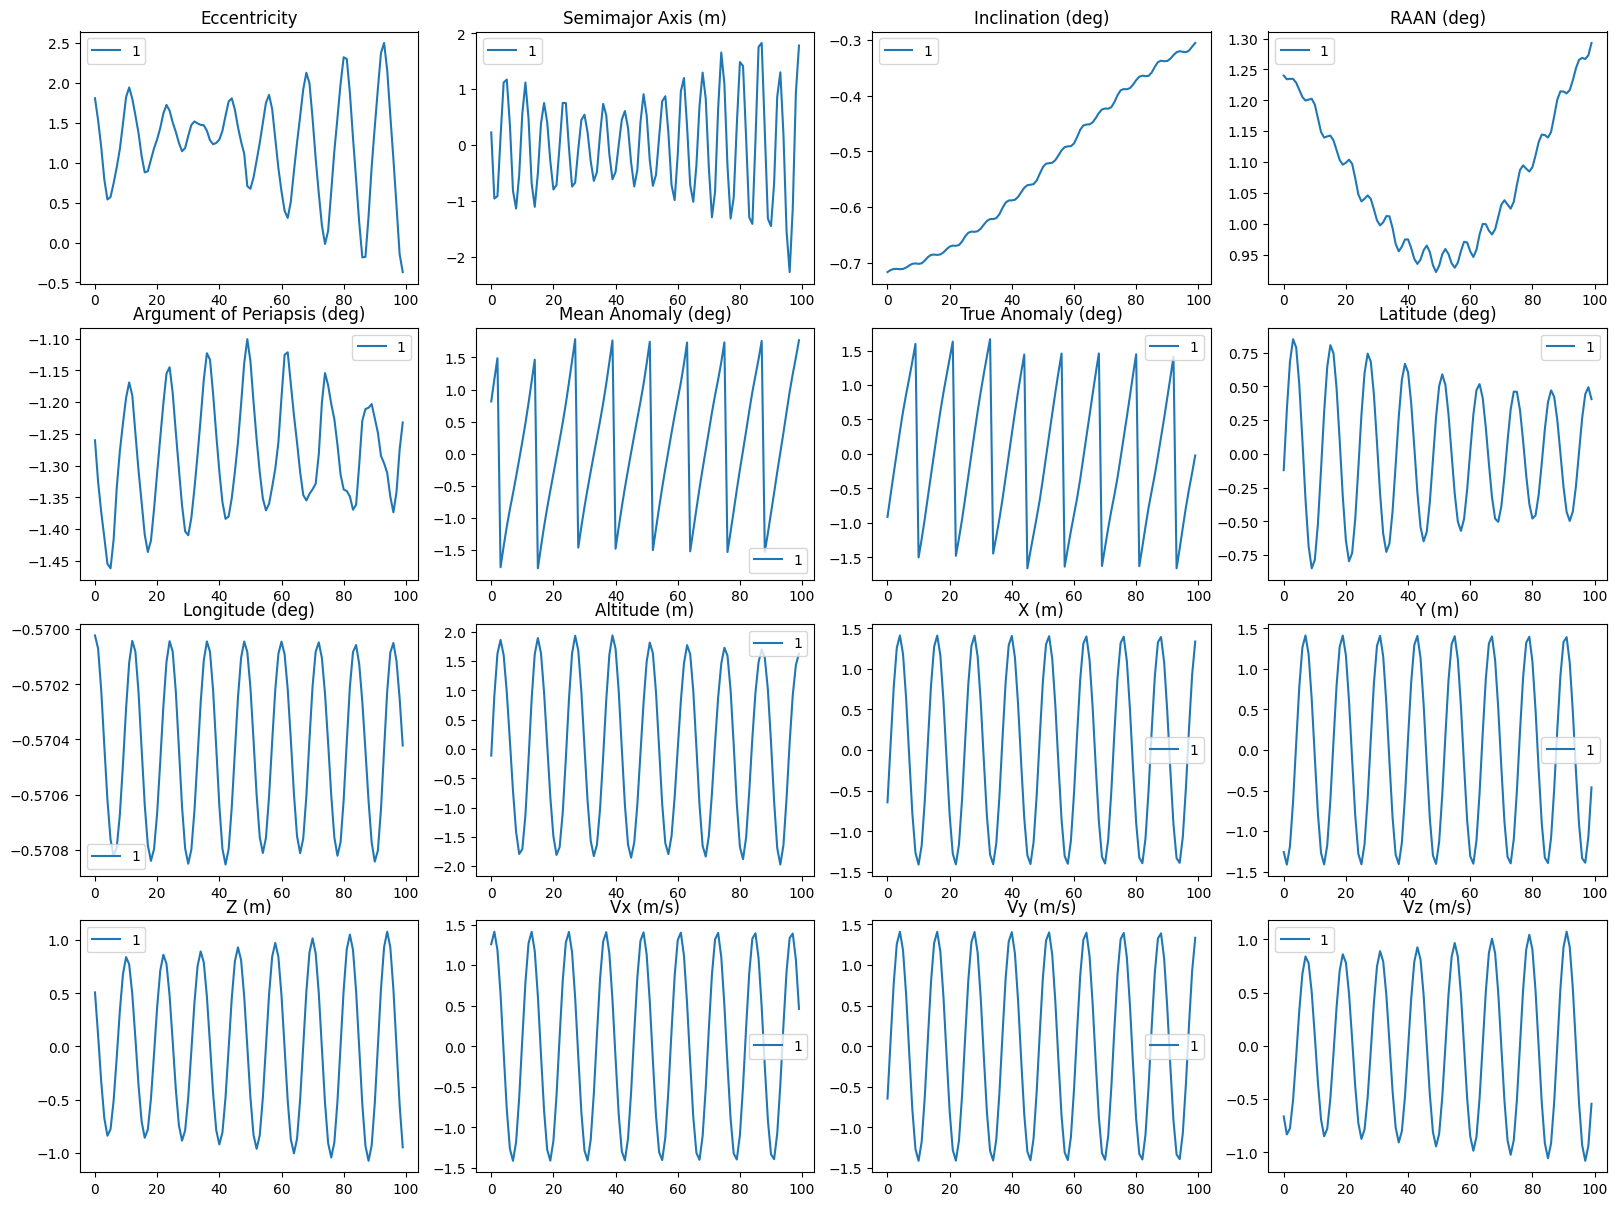

In [141]:
plot_hists(scaled_df, 1)
plot_vals(scaled_df, [1], time_index_start=0, time_index_end=100)

C:\Users\David\AppData\Local\Temp\ipykernel_9468\1966163219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mean Anomaly (sin)'] = np.sin(np.deg2rad(df['Mean Anomaly (deg)']))
C:\Users\David\AppData\Local\Temp\ipykernel_9468\1966163219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mean Anomaly (cos)'] = np.cos(np.deg2rad(df['Mean Anomaly (deg)']))
C:\Users\David\AppData\Local\Temp\ipykernel_9468\1966163219.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

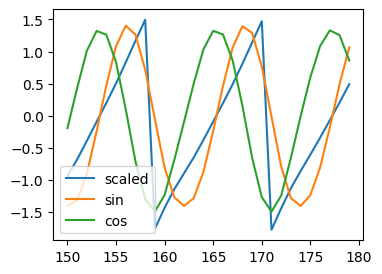

In [153]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
df['Mean Anomaly (sin)'] = np.sin(np.deg2rad(df['Mean Anomaly (deg)']))
df['Mean Anomaly (cos)'] = np.cos(np.deg2rad(df['Mean Anomaly (deg)']))
df[['Mean Anomaly (sin)', 'Mean Anomaly (cos)']] = StandardScaler().fit_transform(df[['Mean Anomaly (sin)', 'Mean Anomaly (cos)']].values)
obj_df = df.loc[df['ObjectID'] == 1][150:180]
#obj_df[inputs] = StandardScaler().fit_transform(obj_df[inputs].values)
obj_df_scaled = scaled_df.loc[df['ObjectID'] == 1][150:180]
ax.plot(obj_df['TimeIndex'], obj_df_scaled['Mean Anomaly (deg)'], label='scaled')
ax.plot(obj_df['TimeIndex'], obj_df['Mean Anomaly (sin)'], label='sin')
ax.plot(obj_df['TimeIndex'], np.sin(np.deg2rad(df['Mean Anomaly (deg)'])), label='sin2')
ax.plot(obj_df['TimeIndex'], obj_df['Mean Anomaly (cos)'], label='cos')
#ax.plot(obj_df['TimeIndex'], np.arctan2(np.sin(np.deg2rad(obj_df['Mean Anomaly (deg)'])), np.cos(np.deg2rad(obj_df['Mean Anomaly (deg)']))), label='atan')
ax.legend()
fig.show()
